# Marketing Campaign Analysis

## 1. Libraries importation and functions definition

First things first: import useful modules and classes and define functions.

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Graphic data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries for Machine Learning
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, \
                            accuracy_score, balanced_accuracy_score

# Visualize diagrams for sklearn objects
set_config(display='diagram')

# Class imbalance handler
from imblearn.combine import SMOTETomek

# The classifier
from xgboost import XGBClassifier
    
# Time handling
import time

# Define the seed for general use
rand_seed = 7953

def show_results(y_test, y_pred):
    """
    Used to visualize the classification results

    Parameters
    ----------
    y_test: 
        The test tags.
    y_pred: 
        The predicted tags.

    Returns
    -------
        Print of confussion matrix and classification report
    """
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), xticklabels=['NO', 'YES'], 
                yticklabels=['NO', 'YES'], annot=True, fmt="d")
    plt.title("Confussion Matrix")
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()
    print(classification_report(y_test, y_pred))
    return None

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## 2. Exploratory Data Analysis (EDA)
Load the CSV into a pandas DataFrame and visualize the data.

In [2]:
# Load the CSV
mkt = pd.read_csv('mkt_bank.csv')

# Replace the word 'desconocido' with NaN
mkt.replace(to_replace='desconocido', value=np.NAN, inplace=True)

# See some values
mkt.head()

,Unnamed: 0,Edad,Trabajo,Estado civil,Educacion,Default,Prestamo vivienda,Prestamo personal,Contacto,Mes,...,Cantidad de contactos,Dias,Anterior,Resultado anterior,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,34,Obrero,casado,basica.9y,no,si,no,celular,may,...,5,999,0,inexistente,-1.8,92.893,-46.2,1.299,5099.1,no
1,1,59,Gerente,casado,basica.4y,NaN,si,no,telefono,may,...,5,999,0,inexistente,1.1,93.994,-36.4,4.857,5191.0,no
2,2,40,Administrativo,casado,secundario,no,NaN,NaN,telefono,jun,...,6,999,0,inexistente,1.4,94.465,-41.8,4.961,5228.1,no
3,3,32,Autonomo,casado,secundario,no,si,no,celular,aug,...,3,999,0,inexistente,1.4,93.444,-36.1,4.964,5228.1,no
4,4,46,Administrativo,casado,secundario,no,no,no,celular,aug,...,17,999,0,inexistente,1.4,93.444,-36.1,4.962,5228.1,no


In [3]:
# Inspect data structure and look for missing values
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35010 entries, 0 to 35009
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             35010 non-null  int64  
 1   Edad                   35010 non-null  int64  
 2   Trabajo                34725 non-null  object 
 3   Estado civil           34937 non-null  object 
 4   Educacion              33553 non-null  object 
 5   Default                27721 non-null  object 
 6   Prestamo vivienda      34171 non-null  object 
 7   Prestamo personal      34171 non-null  object 
 8   Contacto               35010 non-null  object 
 9   Mes                    35010 non-null  object 
 10  Dia de la semana       35010 non-null  object 
 11  Cantidad de contactos  35010 non-null  int64  
 12  Dias                   35010 non-null  int64  
 13  Anterior               35010 non-null  int64  
 14  Resultado anterior     35010 non-null  object 
 15  em

In [4]:
# Visualize some statistics
mkt.describe()

,Unnamed: 0,Edad,Cantidad de contactos,Dias,Anterior,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000
mean,17504.500000,40.036161,2.564296,961.703942,0.172951,0.081331,93.576524,-40.501168,3.619927,5166.947615
std,10106.660799,10.418603,2.749492,188.795817,0.494587,1.571693,0.578868,4.624621,1.735724,72.386441
min,0.000000,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,8752.250000,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,17504.500000,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,26256.750000,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,35009.000000,98.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


To get an idea of how much unknown categorical data is in the DataFrame, let's see the NaN values column by column.

In [5]:
# Select categorical data only
categ_df = mkt.select_dtypes(include=object)

# Quantify the missing values
categ_df.isna().sum().sort_values()

Contacto                 0
Mes                      0
Dia de la semana         0
Resultado anterior       0
y                        0
Estado civil            73
Trabajo                285
Prestamo vivienda      839
Prestamo personal      839
Educacion             1457
Default               7289
dtype: int64

Now we can print a graph of the missing values

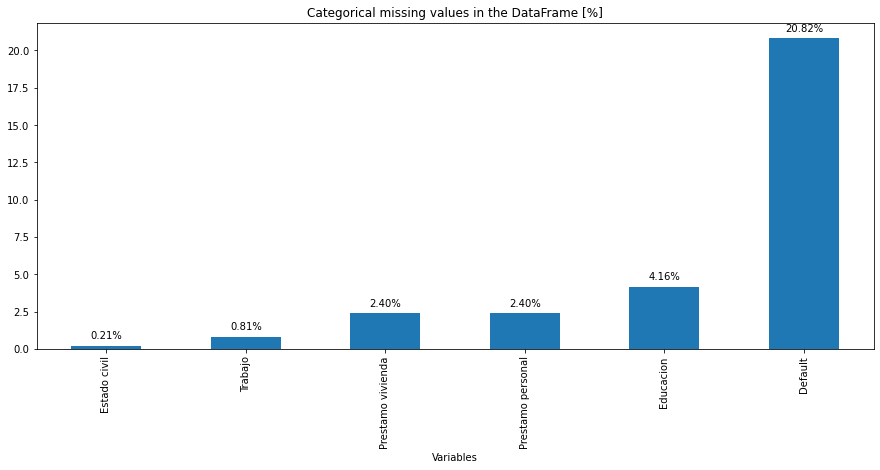

In [6]:
mask = categ_df.isna().mean().sort_values() > 0
ax = (categ_df.loc[:, mask[mask==True].keys()] \
      .isna() \
      .mean() \
      .sort_values()*100) \
      .plot(kind='bar', 
            figsize=(15,6),
            xlabel='Variables', 
            title='Categorical missing values in the DataFrame [%]')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=5)

Same thing with the numerical features

In [7]:
# Select numerical data only
num_df = mkt.select_dtypes(exclude=object)

# Quantify missing values
num_df.isna().sum().sort_values()

Unnamed: 0               0
Edad                     0
Cantidad de contactos    0
Dias                     0
Anterior                 0
emp.var.rate             0
cons.price.idx           0
cons.conf.idx            0
euribor3m                0
nr.employed              0
dtype: int64

Now, let's plot a heatmap with the correlations between features

<AxesSubplot:>

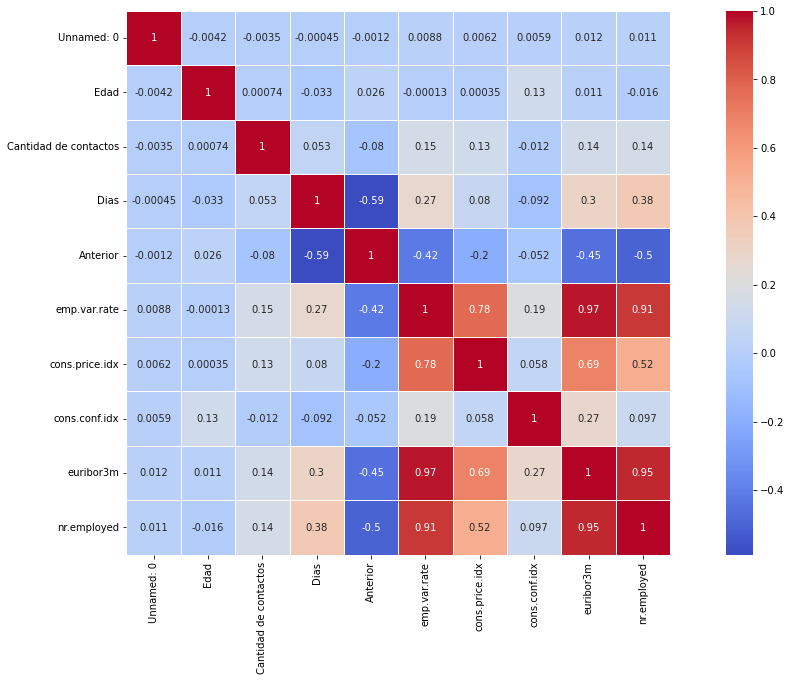

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(
    data=mkt.corr(),
    cmap='coolwarm',
    annot=True,
    linewidths=.5,
    square=True,
    ax=ax
)

There's high correlation between this pairs of features:
- [emp.var.rate, cons.price.idx]
- [emp.var.rate, euribor3m]
- [emp.var.rate, nr.employed]
- [cons.price.idx, euribor3m]
- [nr.employed, euribor3m]

Let's visualize some scatterplots of this pairs in order to infer the relations:

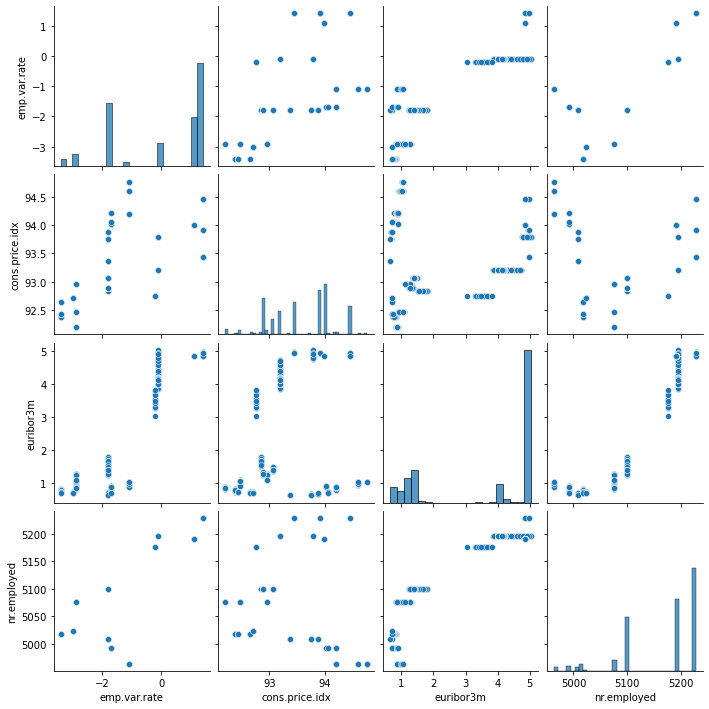

In [9]:
most_corr_features = ['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']
sns.pairplot(mkt[most_corr_features])

Now, we can visualize the quartiles of the numerical data.

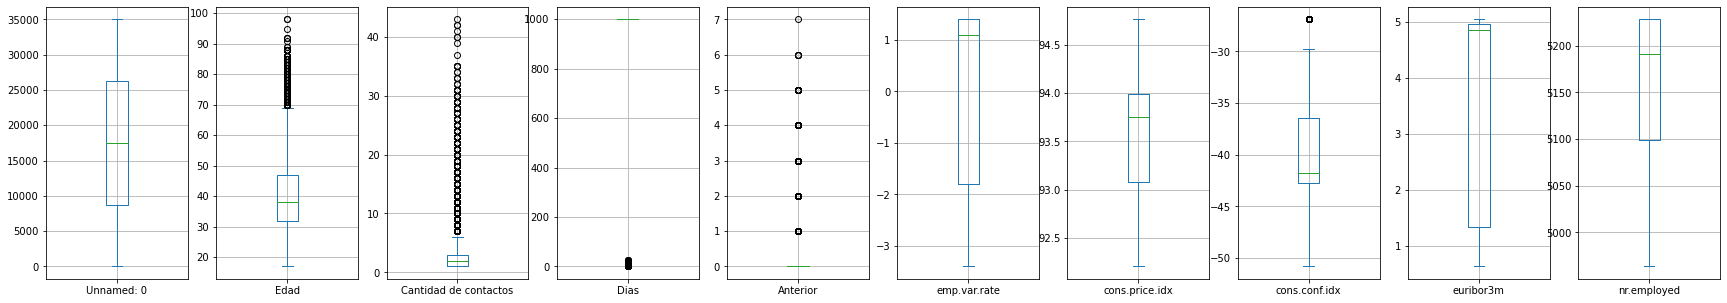

In [10]:
num_df.plot(
    kind='box',
    subplots=True, 
    layout=(1,10), 
    sharex=False, 
    sharey=False,
    figsize=(30,5),
    grid=True
)

plt.show()

The distribution of this data shows us the great skewness present in every feature:

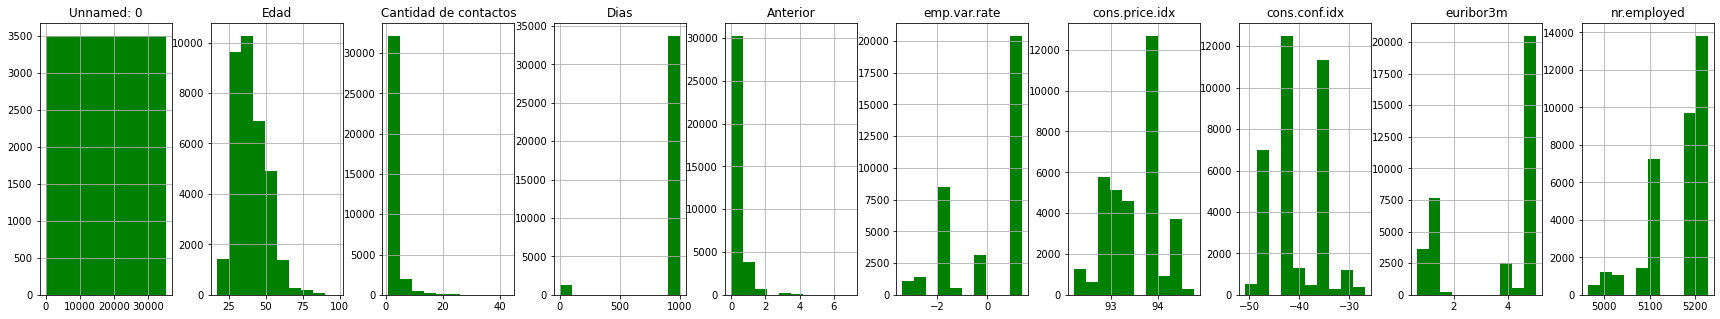

In [11]:
num_df.hist(figsize=(30,5), layout=(1,10), color='green')
plt.show()

We can plot the skewness degree of each feature

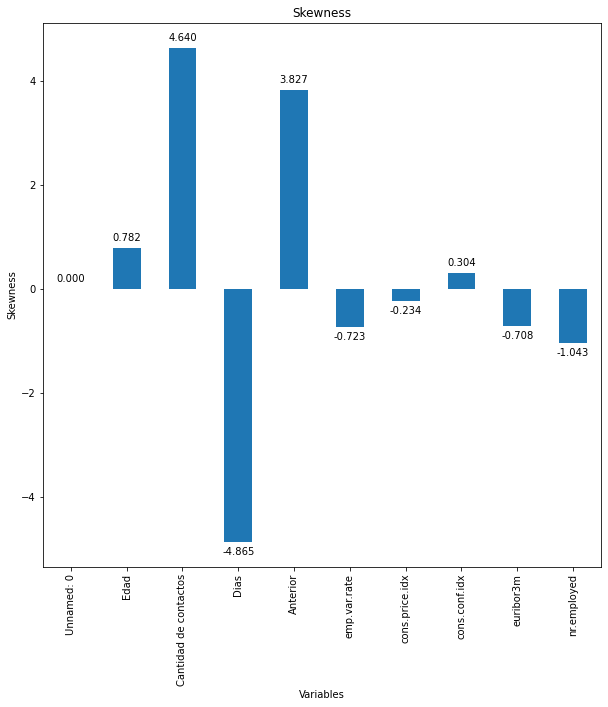

In [12]:
ax = num_df.skew().plot(
    kind='bar', 
    figsize=(10,10),
    xlabel='Variables', 
    ylabel='Skewness',
    title='Skewness',
    grid=False,
    rot=90
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=5)

# 4. Feature Engineering

Let's perform some feature engineering in order to better performance of the machine learning model.

In [13]:
# Assign target variable
y = mkt['y']

# Drop first column and target variable
mkt = mkt.drop(columns=['Unnamed: 0', 'y'], axis=1)

# In the 'Dias' column, 999 means the clien wasn't contacted previously.
# So, let's replace that value for 0 to uniformize the data.
mkt.replace({'Dias': {999: 0}}, inplace=True)

# See the DataFrame
X = mkt

X

,Edad,Trabajo,Estado civil,Educacion,Default,Prestamo vivienda,Prestamo personal,Contacto,Mes,Dia de la semana,Cantidad de contactos,Dias,Anterior,Resultado anterior,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,34,Obrero,casado,basica.9y,no,si,no,celular,may,mon,5,0,0,inexistente,-1.8,92.893,-46.2,1.299,5099.1
1,59,Gerente,casado,basica.4y,NaN,si,no,telefono,may,tue,5,0,0,inexistente,1.1,93.994,-36.4,4.857,5191.0
2,40,Administrativo,casado,secundario,no,NaN,NaN,telefono,jun,tue,6,0,0,inexistente,1.4,94.465,-41.8,4.961,5228.1
3,32,Autonomo,casado,secundario,no,si,no,celular,aug,wed,3,0,0,inexistente,1.4,93.444,-36.1,4.964,5228.1
4,46,Administrativo,casado,secundario,no,no,no,celular,aug,thu,17,0,0,inexistente,1.4,93.444,-36.1,4.962,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35005,35,Administrativo,casado,universitario,no,no,no,celular,may,thu,6,0,0,inexistente,-1.8,92.893,-46.2,1.266,5099.1
35006,31,Servicios,soltero,secundario,no,no,no,celular,jul,thu,3,0,0,inexistente,1.4,93.918,-42.7,4.968,5228.1
35007,39,Obrero,casado,basica.9y,no,si,no,telefono,may,wed,2,0,0,inexistente,1.1,93.994,-36.4,4.859,5191.0
35008,41,Obrero,casado,basica.4y,NaN,si,no,celular,apr,fri,1,0,1,fallida,-1.8,93.075,-47.1,1.405,5099.1


## 4.1 Features Transformation

Let's perform a standarization and one hot encode features via a pipeline, to avoid data leakage when performing predictions later.

In [14]:
# Define pipeline for imputation of the numerical features
num_pipeline = Pipeline(steps=[('Standard Scaler', StandardScaler()),
                               ('Power Transformer', PowerTransformer())])

# Define pipeline for imputation and encoding of the categorical features
categ_pipeline = Pipeline(steps=[('Categorical Imputer', SimpleImputer(strategy='most_frequent')),
                                 ('One Hot Encoder', OneHotEncoder(drop='first'))])

In [15]:
# Get the categorical and numerical columns names
categ_cols = X.select_dtypes(include=object).columns.values
num_cols = X.select_dtypes(exclude=object).columns.values

# Define the transformer
ct = ColumnTransformer(transformers=
                       [('Categorical Pipeline', categ_pipeline, categ_cols),
                        ('Numerical Pipeline', num_pipeline, num_cols)],
                       remainder='passthrough',
                       n_jobs=-1)


# Final pipeline with all transformations.
# Includes a PCA analysis for dimensionality reduction.
# 95% of the variance is explained with this features.
pipe = Pipeline(steps=[('Column Transformer', ct), 
                       ('PCA', PCA(n_components=22, 
                                   svd_solver='full',
                                   random_state=rand_seed)
                        )])

In [16]:
# Let's visualize and check the pipeline
pipe

Pipeline(steps=[('Column Transformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('Categorical Pipeline',
                                                  Pipeline(steps=[('Categorical '
                                                                   'Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('One Hot '
                                                                   'Encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  array(['Trabajo', 'Estado civil', 'Educacion', 'Default',
       'Prestamo vivienda', 'Prestamo personal', 'C...
       'Dia de la semana', 'Resultado anterior'], dtype=object)),
                                                 ('Numerical Pipeline',
                                                  Pipeline(steps=[('Standard '
                                                                   'Scaler',
                                                                   StandardScaler()),
                                                                  ('Power '
                                                                   'Transformer',
                                                                   PowerTransformer())]),
                                                  array(['Edad', 'Cantidad de contactos', 'Dias', 'Anterior',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed'], dtype=object))])),
                ('PCA',
                 PCA(n_components=22, random_state=7953, svd_solver='full'))])

In [17]:
# Transform data
X = pd.DataFrame(data=pipe.fit_transform(X))
X

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2.165278,-1.825555,0.303358,1.399064,0.629436,0.537913,0.384760,-0.838183,-0.849594,-0.415616,...,0.527425,0.566291,0.089079,-0.136164,0.033525,-0.194190,-0.132646,0.319369,-0.106967,-0.167314
1,-1.401652,0.758344,-1.077248,1.648932,0.448029,0.952058,-0.460371,-0.022523,-0.052912,-0.464226,...,0.031732,-0.282558,0.711499,0.078650,-0.064583,-0.177440,0.224849,-0.009061,-0.349635,0.047318
2,-2.336277,0.088805,0.903196,1.457141,-0.150033,0.591046,-0.213589,0.061267,0.842451,-0.478753,...,-0.083628,-0.700035,0.674140,-0.539652,-0.407823,-0.133872,-0.155137,-0.063191,-0.133929,-0.252717
3,-1.604107,0.084160,0.219133,-0.066652,1.456842,-0.950295,0.106037,-0.644427,0.511030,-0.376507,...,-0.040892,-0.424802,-0.696566,-0.487363,-0.083414,-0.176685,-0.507498,0.050919,-0.175508,-0.155603
4,-1.780129,0.421719,-0.477552,1.696167,1.512570,-0.873232,0.144974,-0.532212,0.641637,0.564155,...,-0.920732,0.327163,-0.092794,-0.190544,-0.288238,-0.128112,-0.460639,0.013061,-0.124270,-0.255292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35005,2.158557,-1.705645,0.221498,1.488378,0.829762,0.350494,0.520027,0.479425,-0.416268,0.632466,...,-0.734459,0.477705,-0.010048,-0.354103,0.127507,-0.154216,-0.210802,-0.004937,-0.185111,-0.027925
35006,-1.703948,-0.617996,1.405681,0.251238,0.217218,-0.629078,0.318925,-0.360976,0.942731,0.556333,...,-1.010437,0.295708,-0.006162,0.660157,0.132423,-0.163325,0.121141,0.129545,-0.062126,0.335035
35007,-1.253752,0.326548,-0.232403,-0.103769,0.335293,1.030623,-0.600987,-0.830412,-0.962008,-0.526021,...,0.070654,-0.347511,-0.609016,0.038986,0.054785,-0.161545,0.082077,0.305782,-0.092668,-0.204271
35008,3.353140,0.058252,0.286346,0.068339,-1.699281,-1.014745,-1.344629,-0.275989,-0.427592,-0.407355,...,0.001404,-0.145107,0.044872,-0.071808,-0.019291,-0.149752,-0.352703,-0.424921,-0.045324,-0.021318


Data is more Gaussian-like now

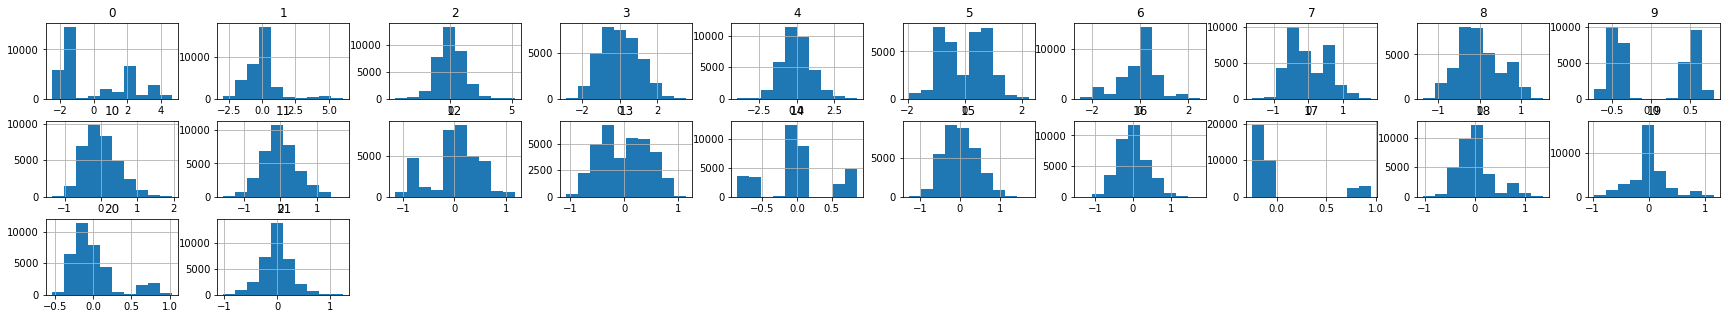

In [18]:
X.hist(figsize=(30,5), layout=(3,10))
plt.show()

# 5. Imbalanced classes handling

The following is done to get an idea of the distribution of classes that the dataset has. As can be seen, only 11.2% are positive, so this gives us an idea of the null model and the high information imbalance.

We're going to use the [SMOTETomek Class](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html#imblearn.combine.SMOTETomek) of the [imblearn package](https://imbalanced-learn.org/stable/) for oversampling the minority class (with SMOTE technique) and posterior cleaning with Tomek link's technique.

In [19]:
print('Classes present in the dataset: ')
print(y.value_counts())

print('\n')

print('Classes proportion: ')
print(y.value_counts(normalize=True))

Classes present in the dataset: 
no    31069
si     3941
Name: y, dtype: int64


Classes proportion: 
no    0.887432
si    0.112568
Name: y, dtype: float64


Below you can see the usage of hte SMOTETomek class in order to generate synthetic new samples based on the K-NN algorithm (k=5). It takes a while to train and resample the data.

In [20]:
smote_tomek = SMOTETomek(random_state=rand_seed, n_jobs=-1)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

Let's see the results

In [21]:
X_resampled

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2.165278,-1.825555,0.303358,1.399064,0.629436,0.537913,0.384760,-0.838183,-0.849594,-0.415616,...,0.527425,0.566291,0.089079,-0.136164,0.033525,-0.194190,-0.132646,0.319369,-0.106967,-0.167314
1,-1.401652,0.758344,-1.077248,1.648932,0.448029,0.952058,-0.460371,-0.022523,-0.052912,-0.464226,...,0.031732,-0.282558,0.711499,0.078650,-0.064583,-0.177440,0.224849,-0.009061,-0.349635,0.047318
2,-2.336277,0.088805,0.903196,1.457141,-0.150033,0.591046,-0.213589,0.061267,0.842451,-0.478753,...,-0.083628,-0.700035,0.674140,-0.539652,-0.407823,-0.133872,-0.155137,-0.063191,-0.133929,-0.252717
3,-1.604107,0.084160,0.219133,-0.066652,1.456842,-0.950295,0.106037,-0.644427,0.511030,-0.376507,...,-0.040892,-0.424802,-0.696566,-0.487363,-0.083414,-0.176685,-0.507498,0.050919,-0.175508,-0.155603
4,-1.780129,0.421719,-0.477552,1.696167,1.512570,-0.873232,0.144974,-0.532212,0.641637,0.564155,...,-0.920732,0.327163,-0.092794,-0.190544,-0.288238,-0.128112,-0.460639,0.013061,-0.124270,-0.255292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61523,-1.238555,0.187439,0.207842,-0.399054,0.636992,0.992600,-0.619333,-0.474814,-0.447159,0.478821,...,0.126815,-0.260755,-0.657392,-0.377063,0.472667,-0.130991,0.283329,0.914811,0.608375,0.118754
61524,-1.637224,-0.643462,1.430750,-0.129976,0.138290,-0.699324,0.381851,-0.274988,0.695238,-0.439220,...,-0.933098,0.236300,0.022806,0.680931,0.149143,-0.214856,0.086472,-0.084575,0.063328,-0.157644
61525,-1.643573,0.632731,-1.096423,0.575328,0.684433,-0.974589,0.236995,-0.364544,0.088178,-0.446766,...,0.268056,-0.280959,-0.445674,-0.113502,-0.160785,-0.151580,-0.328620,-0.006427,-0.253506,0.555147
61526,2.193627,-1.433858,-0.474111,1.287767,0.190397,0.368560,0.539769,0.471402,-0.307623,0.667307,...,0.099344,0.282660,0.011901,-0.368336,0.232025,-0.160482,-0.172404,0.123367,0.567452,0.076411


In [22]:
y_resampled

0        no
1        no
2        no
3        no
4        no
         ..
61523    si
61524    si
61525    si
61526    si
61527    si
Name: y, Length: 61528, dtype: object

In [23]:
print('Classes present in the dataset: ')
print(y_resampled.value_counts())

print('\n')

print('Classes proportion: ')
print(y_resampled.value_counts(normalize=True))

Classes present in the dataset: 
no    30764
si    30764
Name: y, dtype: int64


Classes proportion: 
no    0.5
si    0.5
Name: y, dtype: float64


# 6. Test and train split

We perform the sply using the following criteria: 80% of the data for training and 20% for testing.
Given the high class imbalance present, we use stratification in the method, to obtain sets with the same proportions.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size=0.2,
                                                    stratify=y_resampled, 
                                                    random_state=rand_seed)

In [25]:
X_train.shape, X_test.shape

((49222, 22), (12306, 22))

In [26]:
y_train.shape, y_test.shape

((49222,), (12306,))

# 7. Binary classification model

To perform the classification, we will use the XGBClassifier() class.

Documentation can be viewed here: https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier

The parameters of XGBClassifier() were obtained through an iterative random search with the RandomizedSearchCV() class (see optimization notebook).

In [27]:
# take the initial time
tic = time.time()

# Calculate the proportion between classes
proportion = max(y_train.value_counts()) / min(y_train.value_counts())

# Instantiate the classifier
xgb = XGBClassifier(n_estimators=19,
                    max_depth=5,
                    learning_rate=0.11327315653483172,
                    objective='binary:logistic',
                    max_delta_step=1, 
                    scale_pos_weight=proportion,
                    n_jobs=-1,
                    random_state=rand_seed)

# Entrenamos al modelo de Boosting
xgb.fit(X_train, y_train)

# Tomamos el tiempo final
toc = time.time()

# Visualizamos el tiempo de entrenamiento
print("XGBClassifier training time: {:.2f} seconds ({:.2f} minutes)\n".format(toc-tic, (toc-tic)/60))

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


XGBClassifier training time: 2.51 seconds (0.04 minutes)



Once trained, perform the predictions

In [28]:
# Predictions
y_pred = xgb.predict(X_test)

# Balanced accuracy for each case
print('XGBClassifier results: \n')
print('Training balanced_accuracy: {}'.format(balanced_accuracy_score(y_train, xgb.predict(X_train))))
print('Test balanced_accuracy: {}\n'.format(balanced_accuracy_score(y_test, y_pred)))
print('Training accuracy: {}'.format(accuracy_score(y_train, xgb.predict(X_train))))
print('Test accuracy: {}'.format(accuracy_score(y_test, y_pred)))

XGBClassifier results: 

Training balanced_accuracy: 0.7753443582138069
Test balanced_accuracy: 0.7732813261823501



c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Training accuracy: 0.7753443582138069
Test accuracy: 0.7732813261823501


Now, let's see the confussion matrix and the classification report

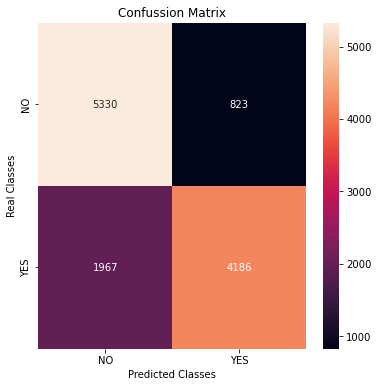

              precision    recall  f1-score   support

          no       0.73      0.87      0.79      6153
          si       0.84      0.68      0.75      6153

    accuracy                           0.77     12306
   macro avg       0.78      0.77      0.77     12306
weighted avg       0.78      0.77      0.77     12306



In [29]:
show_results(y_test, y_pred)

# 8. Validation set
Let's see how our model performs on the validation set.

In [30]:
# Load the CSV
val_df = pd.read_csv('mkt_bank_validation.csv')

# Define the target
y_val = val_df['y']

# Drop unuseful columns
val_df.drop(columns=['Unnamed: 0', 'y'], inplace=True)

# Set the features
X_val = pd.DataFrame(pipe.fit_transform(val_df))

# Predict
y_val_pred = xgb.predict(X_val)

# Print results
print('Validation metrics: \n')
print('balanced_accuracy: {}\n'.format(balanced_accuracy_score(y_val, y_val_pred)))
print('accuracy: {}'.format(accuracy_score(y_val, y_val_pred)))

Validation metrics: 

balanced_accuracy: 0.6062399522066436

accuracy: 0.4465846552282292


c:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


As we can see below, the model isn't perfect and it performs a little bit worse in one of the classes due the high imbalance.

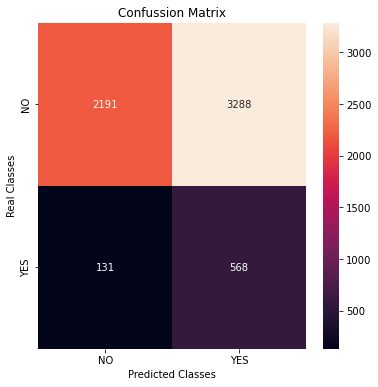

              precision    recall  f1-score   support

          no       0.94      0.40      0.56      5479
          si       0.15      0.81      0.25       699

    accuracy                           0.45      6178
   macro avg       0.55      0.61      0.41      6178
weighted avg       0.85      0.45      0.53      6178



In [31]:
# Plot classification results
show_results(y_val, y_val_pred)

# 9. Expected utility
In this section we are going to calculate the probabilities of each case and the utility.

Start by calculating probabilities with the test and predictions data.

In [32]:
# Probabilities
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
p_tp = tp / (tp + fn) # True positive
p_fn = fn / (tp + fn) # False negative
p_tn = tn / (tn + fp) # True negative
p_fp = fp / (tn + fp) # False positive

# Print everything
print('True positive probability: {:.2f} %'.format(p_tp*100))
print('False negative probability: {:.2f} %'.format(p_fn*100))
print('True negative probability: {:.2f} %'.format(p_tn*100))
print('False positive probability: {:.2f} %'.format(p_fp*100))

True positive probability: 68.03 %
False negative probability: 31.97 %
True negative probability: 86.62 %
False positive probability: 13.38 %


Expected utility

In [33]:
# Values according the problem description
b_tp = 2900
b_tn = 200
c_fp = -440
c_fn = 0

proportion = y.value_counts(normalize=True)

class_0 = proportion[0]
class_1 = proportion[1]
expected_value = class_1 * (p_tp * b_tp + p_fn * c_fn) + class_0 * (p_tn * b_tn + p_fp * c_fp)
print('Expected utility is EUR {:.2f}'.format(expected_value))

Expected utility is EUR 323.61
